# L10 (6.05)  data exploration of StarCraft dataset 

* StarCraft is an RTS game where players are assigned (based on their skill) to different Leagues. 
* APM is an acronym for Actions Per Minute, i.e. how many actions (sending unit, clicking attack, etc.) given player
performed in one minute

In this notebook we will look at factors affecting league assigned to given player

## New pandas skills
* groupby
* query syntax (no really new capabilities, just easier to use)

## New "general" skills
* calculating correlations
* transforming (usually using log) axis 
* performing quick and dirty (frequential) statistical tests in Python

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

/Users/kudkudak/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Read data, replace missing data by '?'
df = pd.read_csv("data/SkillCraft1_Dataset.csv", na_values=["?"])

In [4]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0,0.000019


### Groupby

In [5]:
# Groupby returns strange object which exposes few things. 
# If you know SQL this is something that enables you to finish the query (for instance calculate mean in groups)
strange_obj = df.groupby("LeagueIndex")

In [6]:
m = strange_obj['APM']

In [7]:
strange_obj['APM'].median()

LeagueIndex
1     54.0450
2     71.6754
3     85.9590
4    103.8072
5    126.0075
6    152.1852
7    185.3424
8    274.3404
Name: APM, dtype: float64

In [8]:
# Besides being strange, it is also a list of tuples, where
# each tuple is simply value of column grouped on (or set of columns) and resulting DataFrame
print("Different LeagueIndexes" + str(len(strange_obj)))
dfs = list(strange_obj)
print("LeagueIndex=" + str(dfs[0][0]))
dfs[0][1].head()

Different LeagueIndexes8
LeagueIndex=1


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
36,171,1,18,6,230,69.5076,0.000175,0.000204,4,0.000058,0.000204,0.001459,45.0612,112.9600,9.1400,11,0.000584,4,0.000000,0.000000
106,363,1,33,4,120,68.6598,0.000302,0.000323,0,0.000000,0.000062,0.002396,48.6812,87.5130,5.4130,23,0.000542,6,0.000000,0.000208
167,532,1,22,20,315,54.0792,0.001258,0.000296,3,0.000037,0.000481,0.002182,37.1724,111.6610,3.9492,14,0.001332,5,0.000000,0.000000
187,590,1,19,16,730,60.4956,0.000831,0.000082,2,0.000000,0.000615,0.002195,103.9624,93.3271,5.2103,36,0.001292,7,0.000318,0.000462


LeagueIndex
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
7    Axes(0.125,0.125;0.775x0.775)
8    Axes(0.125,0.125;0.775x0.775)
Name: APM, dtype: object

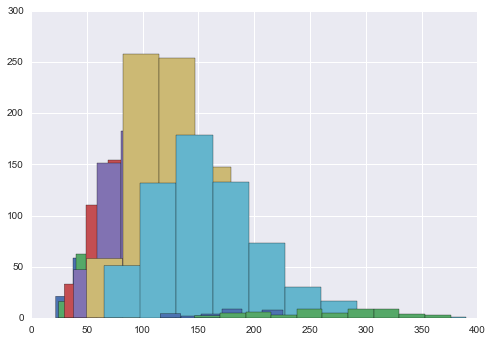

In [9]:
strange_obj['APM'].hist()

In [10]:
df.groupby("LeagueIndex").size()

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
dtype: int64

In [11]:
df.groupby("LeagueIndex")['APM'].mean() # Average clicks per minute

LeagueIndex
1     59.539277
2     74.780917
3     89.971260
4    105.847166
5    131.520718
6    158.683211
7    189.555686
8    267.341236
Name: APM, dtype: float64

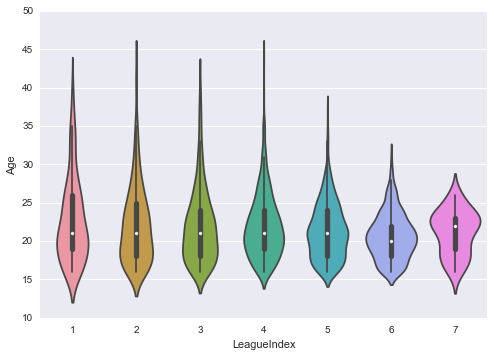

In [12]:
sns.violinplot(x="LeagueIndex", y="Age", data=df, order=[1, 2, 3, 4, 5, 6, 7])

### Minor trick: histogram with set number of bins is less deceiving

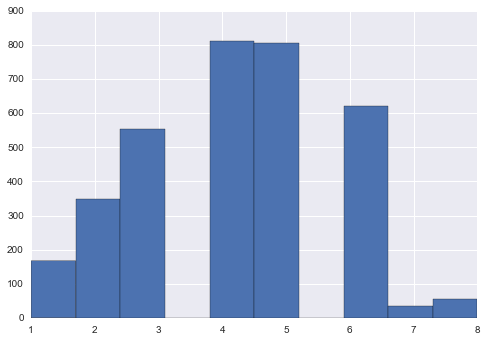

In [13]:
df["LeagueIndex"].hist()

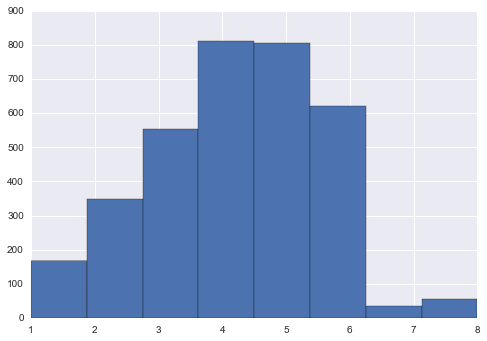

In [14]:
df["LeagueIndex"].hist(bins=len(df["LeagueIndex"].unique()))

### Correlation

Pearson (linear) correlation captures linear relationships between variables. This can be readily seen
by examining linear regression solution. [TODO: insert it here]

We can quickly visualize correlations in pandas:

In [15]:
df_some = df.loc[:,"LeagueIndex":"APM"]
df_some.corr()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
LeagueIndex,1.000000,-0.127825,0.217976,0.023884,0.662309
Age,-0.127825,1.000000,-0.184508,-0.016630,-0.210559
HoursPerWeek,0.217976,-0.184508,1.000000,0.024306,0.246844
TotalHours,0.023884,-0.016630,0.024306,1.000000,0.072850
APM,0.662309,-0.210559,0.246844,0.072850,1.000000


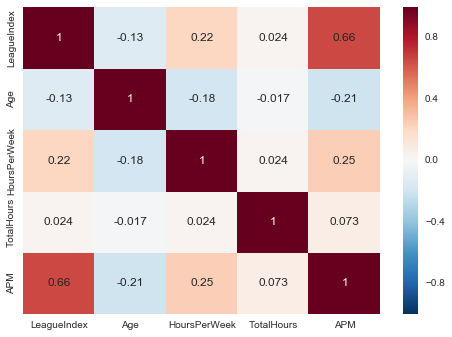

In [16]:
sns.heatmap(df_some.corr(), annot=True)

Spearman correlation is not requiring linear relationship and is less sensitive to outliers

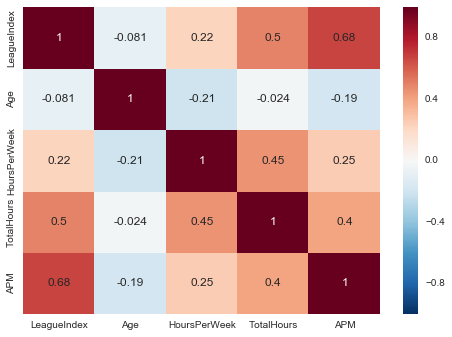

In [17]:
sns.heatmap(df_some.corr(method='spearman'), annot=True)

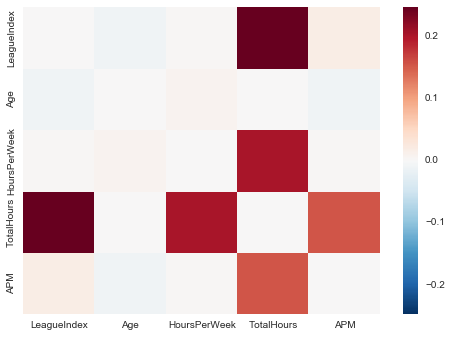

In [18]:
# możemy też wykreślić różnicę ich kwadratów
sns.heatmap(df_some.corr(method='spearman')**2 - df_some.corr(method='pearson')**2)

### Statistical tests

It is useful to know how to perform basic statistical tests (one reason being people often ask for such).

* Simple pearson correlation test. It just assesses if linear relationship between 2 random variables could
be by chance

In [20]:
df_scaled = df.query("HoursPerWeek > 0").copy() # Will be needed for log10
df_scaled['APM_log10'] = np.log10(df_scaled['APM'])
df_scaled['HoursPerWeek_log10'] = np.log10(df_scaled['HoursPerWeek'])

In [21]:
## Pearson correlation using scipy
# Very low p-value (easily below magic 0.05), so we reject null hypothesis
scipy.stats.spearmanr(df_scaled['APM_log10'], df_scaled['HoursPerWeek_log10']) 

SpearmanrResult(correlation=0.25161098780778218, pvalue=2.2965326622952535e-49)

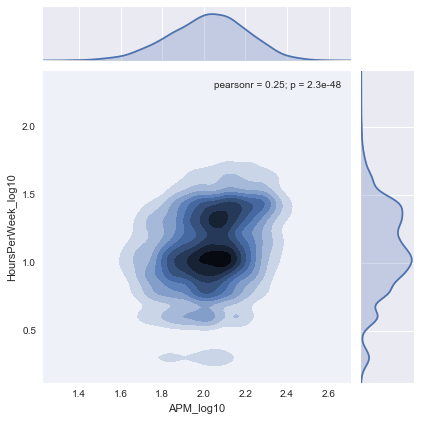

In [22]:
## Pearson correlation visually (legend in the corner)
sns.jointplot(x="APM_log10", y="HoursPerWeek_log10",
              data=df_scaled, kind="kde")

 * ANOVA (ANalysis Of VAriances) can be for instance used to assess if two groups have significant differences

In [23]:
# Create dict league_index -> APM (actions per minute)
data = {}
# Note: would be slightly shorter using groupby
for league_index in range(1, 8):
    # Note: same as
    # df[df['LeagueIndex'] == league_index]
    data[league_index] = df.query("LeagueIndex=={}".format(league_index))['APM']
    # Convert to numpy array
    data[league_index] = np.array(data[league_index])

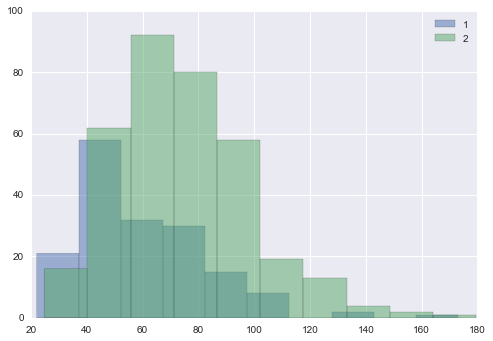

In [32]:
plt.hist(data.values()[0], alpha=0.5, label=data.keys()[0:1])
plt.hist(data.values()[1], alpha=0.5, label=data.keys()[1:2])
plt.legend()

In [41]:
test_result = scipy.stats.f_oneway(data.values()[0], data.values()[1])
print("pvalue=" + str(test_result.pvalue)) # Test passed, 2e-11 for chance result

pvalue=2.52126514592e-11


## Exercise 1 [are players' ages significantly different across different leagues?, 2 points]

* Select all data, where LeagueIndex is in [1,3,6] (you can use df.query() syntax).

* Include histograms of ages for each LeagueIndex (3 plots), make sure histograms include legend

* Include boxplot of ages for each LeagueIndex

* What is the mean and std of age for each LeagueIndex? (you can use groupby)

* Perform oneway ANOVA test

## Exercise 2 [10000 hours to master any subject?, 2 points]

* Plot boxplot with x="LeagueIndex", y="TotalHours" (see previous lecture).

You should get something like this: <img width=300, src="img/10/ex2.png">

* There is a popular saying that it takes 10k hours to master any skill. Is the single most important factor affecting LeagueIndex is spent time playing StarCraft? Include plots/statistics that confirm your conclusions.

# Exercise 3 [Produce cool plot for your company meeting, 1 point]

* Add new columns 'Age_log10', 'TotalHours_log10', 'HoursPerWeek_log10', 'APM_log10', which are log transformed corrsponding columns in the original DataFrame
* Using seaborn.pairplot produce plot similar to this <img src="img/10/ex3.png">